# Plotting jointcal chi2 debug files

Print some summary information and make plots of chi2 values from measuredStar/refStar chi2 debug files. This files are written by setting the `writeChi2FilesInitialFinal` and `writeChi2FilesOuterLoop` JointcalConfig options to `True`.

In [1]:
%matplotlib notebook

import os
import collections
import numpy as np

import astropy.io.ascii

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 120
matplotlib.rcParams['figure.dpi'] = 120
sns.set_style("ticks")
sns.set_context("notebook", font_scale=1.3, rc={"lines.linewidth": 2.5})

In [2]:
def colorbar(mappable, pad=0.05):
    """Stolen from: http://joseph-long.com/writing/colorbars/"""
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=pad)
    return fig.colorbar(mappable, cax=cax)

## functions

In [3]:
def summarize(data, min_chi2 = 1000):
    """Print summary info about a chi2 debug file."""
    max_chi2 = data[data['chi2'] == data['chi2'].max()]
    print(f"max chi2: {max_chi2['chi2'][0]}")

    high_chi2 = data[data['chi2'] > min_chi2]
    if 'visit' in data.colnames:
        counter = collections.Counter(zip(high_chi2['visit'], high_chi2['chip']))
        print(f"visit, detector pairs with chi2 > {min_chi2}")
        for x in counter.most_common():
            print(f"{x[0]}: {x[1]}")

In [4]:
def plot_sky(data, min_chi2 = 1000):
    """Plot the points on-sky, with the high chi2 values in red."""
    fig = plt.figure(tight_layout=True)
    high_chi2 = data[data['chi2'] > min_chi2]
    plt.scatter(data['ra'], data['dec'], s=.1, marker='.', c='black', alpha=.2, label="all sources")
    plt.scatter(high_chi2['ra'], high_chi2['dec'], s=5, c='red', label=f"chi2 > {min_chi2} sources")
    plt.xlabel('ra (deg)')
    plt.ylabel('dec (deg)')
    plt.legend(fontsize="x-small")

## Read data

These DM-31267 files were written while trying to debug a jointcal run failure that ended up being because of a bad pipetask configuration (not all detectors were processed for each tract). 

In [5]:
path = '/home/parejkoj/lsst/temp/DM-31267/'
# subname = 'init-DistortionsPositions_chi2-9697_HSC-Z'
# subname = 'iterate_0_chi2-9697_HSC-Z'
subname = 'iterate_1_chi2-9697_HSC-Z'
meas_file = os.path.join(path, f'astrometry_{subname}-meas.csv')
meas_data = astropy.io.ascii.read(meas_file, format='csv', delimiter='\t', data_start=2)
ref_file = os.path.join(path, f'astrometry_{subname}-ref.csv')
ref_data = astropy.io.ascii.read(ref_file, format='csv', delimiter='\t', data_start=2)

In [6]:
summarize(meas_data, 4000)

max chi2: 30522.0071
visit, detector pairs with chi2 > 4000
(36504, 1): 19
(36466, 0): 17
(36466, 18): 12
(36504, 0): 12
(36504, 3): 11
(36466, 12): 10
(36424, 28): 7
(36466, 17): 6
(36504, 2): 4
(36466, 5): 3
(36466, 6): 3
(36504, 17): 3
(36504, 18): 3
(36466, 1): 2
(36424, 21): 1
(36504, 19): 1


In [7]:
summarize(ref_data)

max chi2: 434.264746


<IPython.core.display.Javascript object>


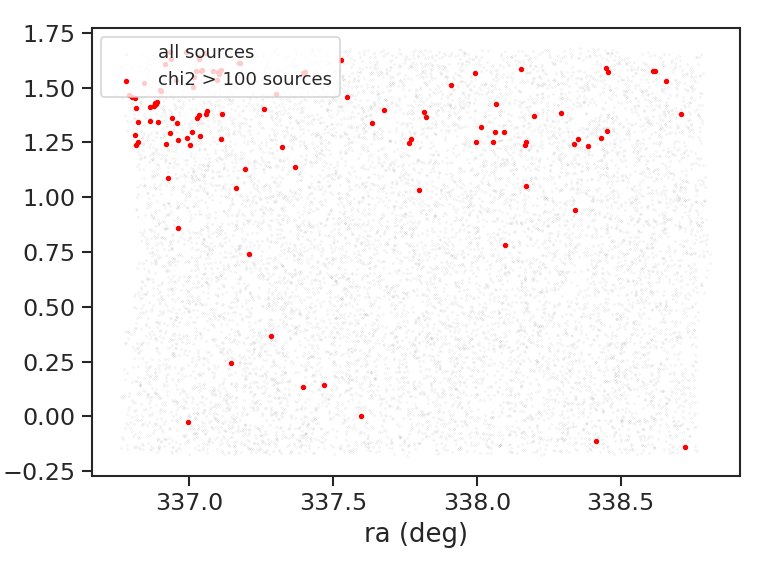

In [8]:
plot_sky(ref_data, 100)

<IPython.core.display.Javascript object>


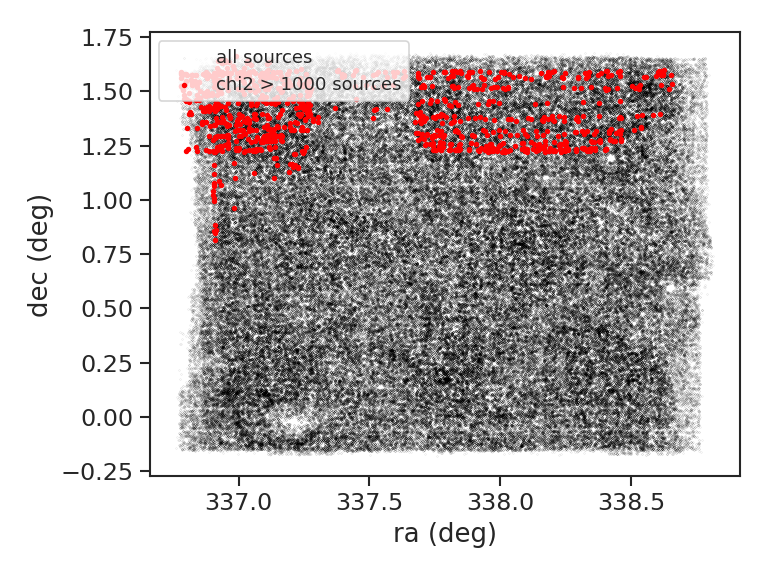

In [9]:
plot_sky(meas_data)